In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import csv
print("Setup Complete")

In [ ]:
data_csv = pd.read_csv('data_with_gender.csv')

In [ ]:
# top 10 most popular names of Males and Females
data_csv['Ten'] = data_csv['Name'].apply(lambda x: x.split()[-1])
data_csv['Ho'] = data_csv['Name'].apply(lambda x: x.split()[0])

data_ten = data_csv.groupby(['Ten', 'Gender']).size().reset_index(name='Count')
data_ten = data_ten.sort_values(by='Count', ascending=False)


In [ ]:
data_ten[data_ten['Gender'] == 'MALE'].head(10)

In [ ]:
data_ten[data_ten['Gender'] == 'FEMALE'].head(10)

In [ ]:
# dùng biểu đồ boxplot dể xem phân phối của số tiền giao dịch nam và nữ
# Plotting the boxplot with a logarithmic scale

data_csv['Log10Amount'] = data_csv['Amount'].apply(lambda x: np.log10(x))
data_csv = data_csv.sort_values(by='Date')

plt.figure(figsize=(20, 6))
sns.boxplot(x='Date', y='Log10Amount', hue='Gender', data=data_csv)
plt.title('Phân phối số tiền giao dịch nam nữ theo ngày (Log Scale)')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()


In [ ]:
# dùng biểu đồ box plot dể xem phân phối của số tiền giao dịch nam và nữ theo khoảng tiền

data_csv['AmountRange'] = pd.cut(data_csv['Amount'], 
                                 bins=[0, 20000, 100000, 200000, 1000000, 100000000, 40000000000],
                                labels=['0-20k', '20-100k', '100-200k', '500k-1M', '1M-100M', '100M-40B'])

plt.figure(figsize=(20, 6))
sns.boxplot(x='AmountRange', y='Amount', hue='Gender', data=data_csv)
plt.title('Phân phối số tiền giao dịch nam nữ theo khoảng tiền')
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend(loc='upper left')
plt.show()

In [40]:
def pre_process_text(text):
    text = re.sub(r'\d\d\d+', '#', text)
    text = text.strip('"')
    return text

def case_1(text):
    text = re.sub(r'^(#\.#\.#\.|.*#\.Vietcombank|.*#\.)', '', text)
    text = re.sub(r'^(Chuyen tien lien ngan hang#\.#\.#\.|.*:#:|# #-#_|.*: #:|.*_# #)', '', text)
    text = re.sub(r'^(Chuyen tien den tu NAPAS Noi dung: )', '', text)
    text = re.sub(r'^(CT nhanh # den: )', '', text)
    return text

def case_2(text):
    text = re.sub(r'(MBVCB.\#\.\.|Remark Vietcombank;#;|Vietcombank;#;)', ' ', text)
    text = re.sub(r'TKThe :#xxx, tai [A-Za-z ]+\. ', '', text)
    text = re.sub(r'.*@PL@', '', text)
    return text

def case_3(text):
    text = re.sub(r'(-#-|- #-|-CTL|.CT tu|; thoi gian).*', '', text)
    return text

def getContent(text):
    text = pre_process_text(text)
    text = case_1(text)
    text = case_2(text)
    text = case_3(text)
    return text

data_csv['Content'] = data_csv['Description'].apply(getContent)
# data_csv[['Name', 'Content']].to_csv('test.csv', index=False)

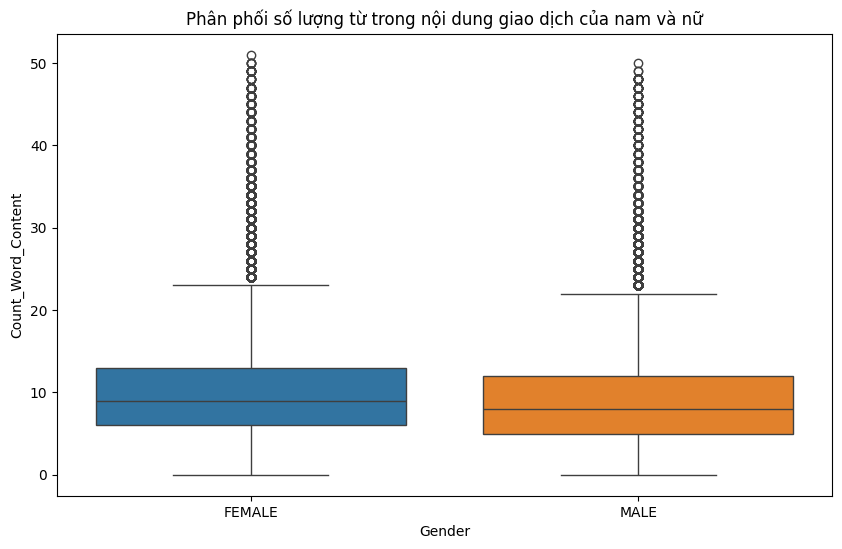

In [41]:
data_csv['Count_Word_Content'] = data_csv['Content'].apply(lambda x: len(x.split()))

# dùng biểu đồ boxplot để xem phân phối số lượng từ trong nội dung giao dịch
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Count_Word_Content' , hue='Gender', data=data_csv)
plt.title('Phân phối số lượng từ trong nội dung giao dịch của nam và nữ')
plt.show()


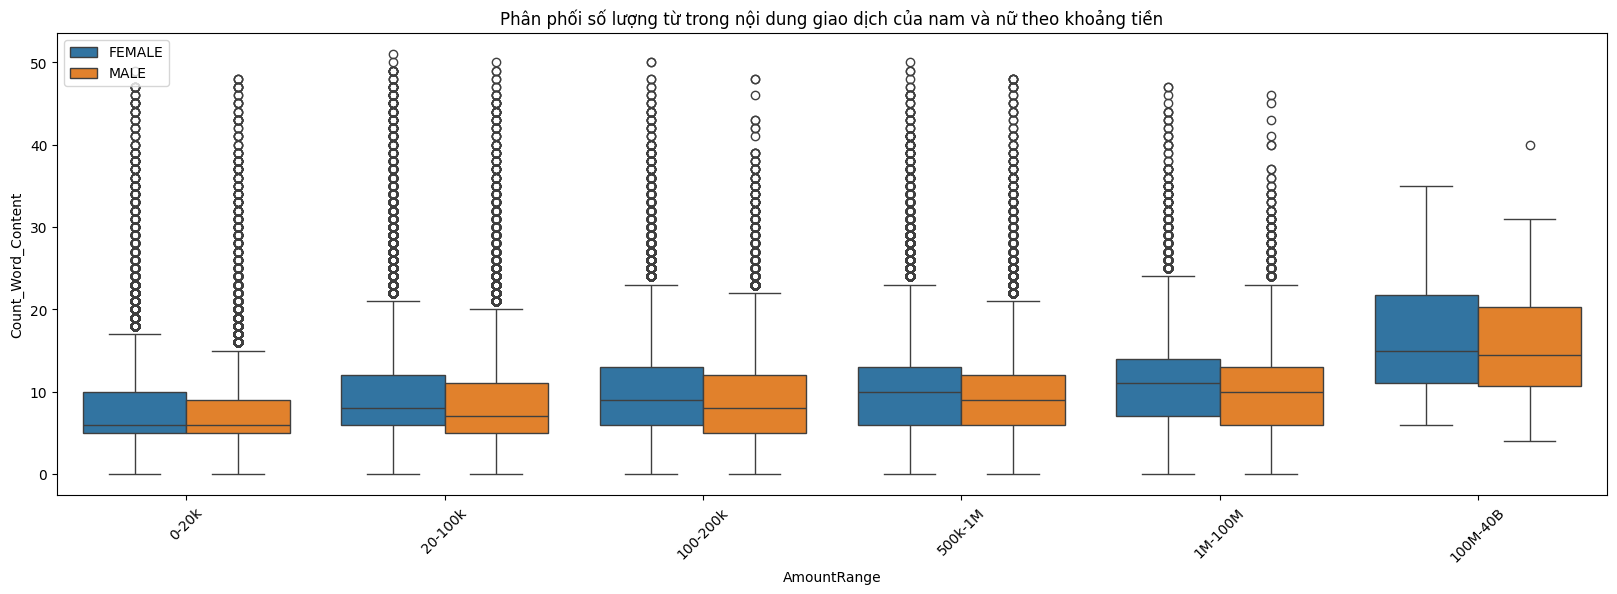

In [42]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='AmountRange', y='Count_Word_Content', hue='Gender', data=data_csv)
plt.title('Phân phối số lượng từ trong nội dung giao dịch của nam và nữ theo khoảng tiền')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [ ]:
data_csv[data_csv['Count_Word_Content'] > 20][data_csv['Amount'] > 100000000][['Name', 'Amount', 'Content']].to_csv('test.csv', index=False)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3824\3643888445.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_csv[data_csv['Count_Word_Content'] > 20][data_csv['Amount'] > 100000000][['Amount', 'Content']].to_csv('test.csv', index=False)
